# Import libs

In [1]:
import pandas as pd
import numpy as np
from knn.knn import knn
from dmc.dmc import dmc
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

# Loading Iris dataset

In [2]:
Xy = pd.read_csv('./datasets/iris.csv')
X = Xy.drop(['class'], axis=1)
y = Xy['class']

# Instantiating models

In [3]:
knn_model = knn(k=3, type_distance_calc='euclidean')
dmc_model = dmc(type_distance_calc='euclidean')

w:\Home\ML\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.__y = pd.Series([])


# Running the tests and computing informations

In [4]:
realizations = 20
knn_hit_rate_list = []
dmc_hit_rate_list = []
knn_std_dev = 0
dmc_std_dev = 0
knn_confusion_matrix_list = []
dmc_confusion_matrix_list = []

for r in range(realizations):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

    knn_model.fit(X_train, y_train)
    dmc_model.fit(X_train, y_train)

    knn_hit_rate_list.append(knn_model.score(X_test, y_test))
    dmc_hit_rate_list.append(dmc_model.score(X_test, y_test))

    knn_y_pred = [knn_model.predict(x) for x in X_test.values]
    dmc_y_pred = [dmc_model.predict(x) for x in X_test.values]

    knn_confusion_matrix_list.append(confusion_matrix(y_test, knn_y_pred))
    dmc_confusion_matrix_list.append(confusion_matrix(y_test, dmc_y_pred))

knn_std_dev = np.std(knn_hit_rate_list)
dmc_std_dev = np.std(dmc_hit_rate_list)

# Showing knn informations computed

In [6]:
print('----------------- KNN model -----------------')
print('Hit rate:')
print(knn_hit_rate_list, end='\n\n')

print('Accuracy:')
print(sum(knn_hit_rate_list)/len(knn_hit_rate_list), end='\n\n')

print('Standard Deviation:')
print(knn_std_dev, end='\n\n')

print('Confusion Matrix:')
for matrix in knn_confusion_matrix_list:
    print(matrix, end='\n')

----------------- KNN model -----------------
Hit rate:
[0.9333333333333333, 0.9333333333333333, 1.0, 0.9666666666666667, 0.9333333333333333, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.8666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 1.0, 0.9666666666666667, 0.9333333333333333, 1.0, 0.9666666666666667, 0.9333333333333333, 0.9666666666666667]

Accuracy:
0.9583333333333333

Standard Deviation:
0.029580398915498074

Confusion Matrix:
[[ 8  0  0]
 [ 0  7  1]
 [ 0  1 13]]
[[ 8  0  0]
 [ 0  8  2]
 [ 0  0 12]]
[[ 7  0  0]
 [ 0  9  0]
 [ 0  0 14]]
[[ 7  0  0]
 [ 0 12  0]
 [ 0  1 10]]
[[10  0  0]
 [ 0 10  1]
 [ 0  1  8]]
[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]
[[12  0  0]
 [ 0  8  1]
 [ 0  0  9]]
[[11  0  0]
 [ 0  9  1]
 [ 0  0  9]]
[[11  0  0]
 [ 0  6  1]
 [ 0  3  9]]
[[ 8  0  0]
 [ 0 10  1]
 [ 0  0 11]]
[[ 9  0  0]
 [ 0 11  1]
 [ 0  0  9]]
[[ 7  0  0]
 [ 0 11  0]
 [ 0  1 11]]
[[12  0  0]
 [ 0  6  0]
 [ 0  1 11]]
[[11  0  0]
 [ 0

# Showing dmc informations computed

In [7]:
print('----------------- DMC model -----------------')
print('Hit rate:')
print(dmc_hit_rate_list, end='\n\n')

print('Accuracy:')
print(sum(dmc_hit_rate_list)/len(dmc_hit_rate_list), end='\n\n')

print('Standard Deviation:')
print(dmc_std_dev, end='\n\n')

print('Confusion Matrix:')
for matrix in dmc_confusion_matrix_list:
    print(matrix, end='\n')

----------------- DMC model -----------------
Hit rate:
[0.9333333333333333, 0.9666666666666667, 0.9333333333333333, 0.9333333333333333, 0.9, 0.9333333333333333, 0.9666666666666667, 0.9333333333333333, 0.8666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9333333333333333, 0.9333333333333333, 1.0, 0.9666666666666667, 0.9, 1.0]

Accuracy:
0.9466666666666667

Standard Deviation:
0.032317865716108854

Confusion Matrix:
[[ 8  0  0]
 [ 0  8  0]
 [ 0  2 12]]
[[ 8  0  0]
 [ 0 10  0]
 [ 0  1 11]]
[[ 7  0  0]
 [ 0  8  1]
 [ 0  1 13]]
[[ 7  0  0]
 [ 0 12  0]
 [ 0  2  9]]
[[10  0  0]
 [ 0 11  0]
 [ 0  3  6]]
[[10  0  0]
 [ 0 10  0]
 [ 0  2  8]]
[[12  0  0]
 [ 0  8  1]
 [ 0  0  9]]
[[11  0  0]
 [ 0  9  1]
 [ 0  1  8]]
[[11  0  0]
 [ 0  6  1]
 [ 0  3  9]]
[[ 8  0  0]
 [ 0 11  0]
 [ 0  1 10]]
[[ 9  0  0]
 [ 0 11  1]
 [ 0  0  9]]
[[ 7  0  0]
 [ 0 11  0]
 [ 0  1 11]]
[[12  0  0]
 [ 0  6  0]
 [ 0  1 11]]
[[11  0  0]
 [ 0  8  0]
 [ 0  1

# Choosing two columns from the last X_train and X_test to plot decision surface

In [8]:
X_train_2d, X_test_2d = X_train[['sepal-length', 'sepal-width']], X_test[['sepal-length', 'sepal-width']]

print('Train dataset:')
print(X_train_2d)
print('Test dataset:')
print(X_test_2d)

Train dataset:
     sepal-length  sepal-width
41            4.5          2.3
99            5.7          2.8
44            5.1          3.8
73            6.1          2.8
100           6.3          3.3
..            ...          ...
13            4.3          3.0
43            5.0          3.5
129           7.2          3.0
136           6.3          3.4
10            5.4          3.7

[120 rows x 2 columns]
Test dataset:
     sepal-length  sepal-width
39            5.1          3.4
35            5.0          3.2
2             4.7          3.2
5             5.4          3.9
145           6.7          3.0
89            5.5          2.5
9             4.9          3.1
32            5.2          4.1
146           6.3          2.5
15            5.7          4.4
127           6.1          3.0
64            5.6          2.9
118           7.7          2.6
19            5.1          3.8
78            6.0          2.9
139           6.9          3.1
147           6.5          3.0
58            6.6

# Training the models with the new dataset 2d

In [9]:
knn_model = knn(k=3, type_distance_calc='euclidean')
knn_model.fit(X_train_2d, y_train)
dmc_model = dmc(type_distance_calc='euclidean')
dmc_model.fit(X_train_2d, y_train)

w:\Home\ML\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.__y = pd.Series([])


# Plotting knn decision surface

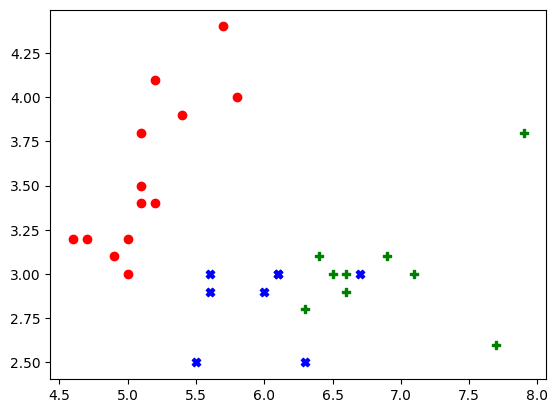

In [10]:
data = X_test_2d[:][:].values

knn_y_pred = np.array([knn_model.predict(x) for x in X_test_2d.values])

setosa = np.where(knn_y_pred == 'Iris-setosa')
virginica = np.where(knn_y_pred == 'Iris-virginica')
versicolor = np.where(knn_y_pred == 'Iris-versicolor')

plt.scatter(data[setosa, 0], data[setosa, 1],
            color='red', marker='o', label='setosa')
plt.scatter(data[versicolor, 0], data[versicolor, 1],
            color='blue', marker='X', label='versicolor')
plt.scatter(data[virginica, 0], data[virginica, 1],
            color='green', marker='P', label='virginica')

plt.show()

# Plotting dmc decision surface

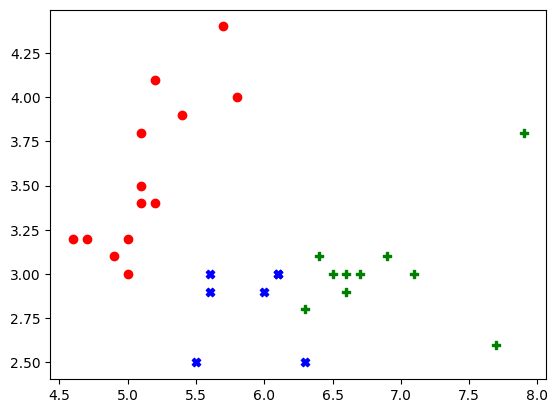

In [11]:
data = X_test_2d[:][:].values

dmc_y_pred = np.array([dmc_model.predict(x) for x in X_test_2d.values])

setosa = np.where(dmc_y_pred == 'Iris-setosa')
virginica = np.where(dmc_y_pred == 'Iris-virginica')
versicolor = np.where(dmc_y_pred == 'Iris-versicolor')

plt.scatter(data[setosa, 0], data[setosa, 1],
            color='red', marker='o', label='setosa')
plt.scatter(data[versicolor, 0], data[versicolor, 1],
            color='blue', marker='X', label='versicolor')
plt.scatter(data[virginica, 0], data[virginica, 1],
            color='green', marker='P', label='virginica')

plt.show()